# **Causal Analysis of Commodity Prices**
Aishwarya Vikas Patil

002772205

## **Title**
## **Exploring Granger Causality in Precious Metal Prices**

**Abstract**

This notebook explores causal relationships among precious metal prices (Gold, Platinum, and Silver) using Granger causality and Vector Autoregression (VAR). By analyzing historical monthly price data from the World Bank's commodity prices dataset, it aims to determine whether past values of one metal can predict future values of another. The analysis includes stationarity tests (ADF and KPSS), transformations to achieve stationarity, Granger causality tests, and multivariate modeling with VAR.

### **What is Granger Causality?**

Granger causality is a statistical hypothesis test for determining whether one time series can predict another. It does not imply true causation but establishes whether past values of one variable contain unique information about the future behavior of another variable.

Null Hypothesis ($H_0$): The lagged values of variable
X
X do not improve predictions for variable
Y
Y.

Alternative Hypothesis ($H_1$): The lagged values of
X
X significantly improve predictions for
Y
Y.

**Stationarity in Time Series**

Time series data must be stationary (constant mean and variance over time) for Granger causality and VAR modeling to be valid.
Using:

**Augmented Dickey-Fuller (ADF) Test:** Tests for unit roots (non-stationarity).

**KPSS Test:** Tests whether a series is stationary around a mean or trend.

**Vector Autoregression (VAR)**

VAR generalizes univariate autoregressive models to multivariate time series by including lagged values of all variables in each equation. It is used to model interdependencies among multiple time series.


### **Dataset Overview**

The dataset contains monthly commodity price trends from January 1960 to March 2020, covering various commodities such as energy, agriculture, and metals. For this analysis, the focus is exclusively on the prices of Gold, Platinum, and Silver.

**Key Variables:**

* GOLD: Monthly average price of gold in USD per troy ounce.

* PLATINUM: Monthly average price of platinum in USD per troy ounce.

* SILVER: Monthly average price of silver in USD per troy ounce.

**Causal Question:**

*Do past values of one metal's price (e.g., Gold) provide predictive information about the future prices of other metals (e.g., Silver or Platinum)?*

This question is addressed using Granger causality, which tests whether lagged values of one variable improve the prediction of another variable.

### **Importing Libraries and Loading Data**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.api import VAR

# Load the dataset
url = '/content/sample_data/commodity_prices.csv'
columns = ['date', 'GOLD', 'PLATINUM', 'SILVER']
df = pd.read_csv(url, usecols=columns)

# Process timestamp
df['date'] = pd.to_datetime(df['date'].apply(lambda s: s.replace('M', '-')))
df.set_index('date', inplace=True)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
             GOLD  PLATINUM  SILVER
date                               
1960-01-01  35.27      83.5    0.91
1960-02-01  35.27      83.5    0.91
1960-03-01  35.27      83.5    0.91
1960-04-01  35.27      83.5    0.91
1960-05-01  35.27      83.5    0.91


***To understand trends in precious metal prices, visualizing their historical trajectories over time. This helps identify patterns and potential correlations between metals***





In [ ]:
# Line plot for precious metals prices
fig = px.line(df.reset_index(), x='date', y=['GOLD', 'PLATINUM', 'SILVER'], labels={'value': 'Price', 'variable': 'Metal'}, title='Precious Metal Prices Over Time')
fig.show()


***The line plot shows significant price fluctuations for all three metals over time. However, the series appear non-stationary, which is a requirement for building a VAR model. Next, we test for stationarity.***

### Stationarity Tests

***Stationarity is essential for time-series modeling. We apply Augmented Dickey-Fuller (ADF) and KPSS tests to determine whether the series are stationary.***

In [ ]:
# Define ADF test function
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

# Define KPSS test function
def kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series.values)
    print(f"KPSS Statistic: {statistic}")
    print(f"p-value: {p_value}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")

# Apply tests to each metal
for metal in df.columns:
    print(f"\nADF Test for {metal}:")
    adf_test(df[metal])
    print("\nKPSS Test for {metal}:")
    kpss_test(df[metal])



ADF Test for GOLD:
ADF Statistic: 0.30207792467520167
p-value: 0.9774396197159891
Critical Values:
   1%: -3.439146171679794
   5%: -2.865422101274577
   10%: -2.568837245865348

KPSS Test for {metal}:
KPSS Statistic: 3.1595927383305833
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

ADF Test for PLATINUM:


<ipython-input-4-1e22241987f2>:12: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




ADF Statistic: -1.386695963053865
p-value: 0.5886373614296893
Critical Values:
   1%: -3.439181811684251
   5%: -2.865437807603377
   10%: -2.5688456132154935

KPSS Test for {metal}:
KPSS Statistic: 3.199494610358769
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

ADF Test for SILVER:


<ipython-input-4-1e22241987f2>:12: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




ADF Statistic: -2.0660673504638263
p-value: 0.25837610011928047
Critical Values:
   1%: -3.439110818166223
   5%: -2.8654065210185795
   10%: -2.568828945705979

KPSS Test for {metal}:
KPSS Statistic: 2.405075459702326
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-4-1e22241987f2>:12: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




### **Stationarity Test Interpretation**
The stationarity tests reveal important characteristics about the time series behavior of GOLD, PLATINUM, and SILVER prices:

**ADF Test Results**

The Augmented Dickey-Fuller test examines the null hypothesis that a time series contains a unit root (is non-stationary).

For all three metals:

* High p-values (GOLD: 0.977, PLATINUM: 0.589, SILVER: 0.258) are well above the 0.05 significance threshold

* ADF statistics (GOLD: 0.302, PLATINUM: -1.387, SILVER: -2.066) are greater than the critical values

Fails to reject the null hypothesis of non-stationarity

**KPSS Test Results**

The KPSS test approaches stationarity from the opposite direction, with a null hypothesis that the series is stationary.

For all three metals:

* Low p-values (all 0.01) are below the 0.05 significance level

* KPSS statistics (GOLD: 3.160, PLATINUM: 3.199, SILVER: 2.405) are substantially higher than all critical values

Rejects the null hypothesis of stationarity

These complementary tests provide strong evidence that all three precious metal price series are non-stationary. This means:

* The statistical properties (mean, variance, autocorrelation) change over time

* These series exhibit trends, cycles, random walks, or combinations of these patterns

* The series cannot be modeled using standard time series techniques without transformation

* The warnings about p-values being outside the range of look-up tables further emphasize the extreme non-stationarity in these series.

**Next Steps**

Before conducting Granger causality analysis or building VAR models, must transform these series to achieve stationarity.

# **Data Transformation**
### ***To achieve stationarity, we calculate percentage changes in prices for each metal. This transformation removes trends while preserving meaningful variations.***

In [ ]:
# Transform data to percentage changes
df_transformed = df.pct_change().dropna()

# Visualize transformed data
fig = px.line(df_transformed.reset_index(), x='date', y=['GOLD', 'PLATINUM', 'SILVER'], labels={'value': '% Change', 'variable': 'Metal'}, title='Transformed Precious Metal Prices (% Change)')
fig.show()


***The transformed series exhibit stationarity as confirmed by reapplying ADF and KPSS tests. This prepares the data for causal analysis using Granger causality and VAR modeling.***

### **Granger Causality Analysis**

***Granger causality tests whether past values of one metal can predict future values of another. We compute p-values to assess causality between Gold, Platinum, and Silver.***

In [ ]:
# Granger causality test function
def grangers_causation_matrix(data, variables, maxlag=4):
    results = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for col in variables:
        for row in variables:
            test_result = grangercausalitytests(data[[row, col]], maxlag=maxlag, verbose=False)
            p_values = [test_result[i + 1][0]['ssr_chi2test'][1] for i in range(maxlag)]
            results.loc[row, col] = min(p_values)
    return results

# Compute Granger causation matrix
granger_matrix = grangers_causation_matrix(df_transformed, variables=df_transformed.columns)
print("Granger Causation Matrix:")
print(granger_matrix)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1

Granger Causation Matrix:
              GOLD  PLATINUM    SILVER
GOLD      1.000000  0.093928  0.188484
PLATINUM  0.002025  1.000000  0.022666
SILVER    0.209547  0.348574  1.000000


### **Interpretations:**
The Granger causality matrix reveals important temporal relationships between gold, platinum, and silver prices. This analysis helps identify which metal prices can predict future movements in others.

### **Key Findings**

Directional Causality Relationships:

1. GOLD → PLATINUM (p-value = 0.002025)

* Past gold prices strongly Granger-cause future platinum prices

* This is statistically significant at the 1% level

* Suggests gold price movements lead platinum price movements

2. SILVER → PLATINUM (p-value = 0.022666)

* Past silver prices Granger-cause future platinum prices

* Significant at the 5% level

* Indicates silver also provides predictive information for platinum

3. PLATINUM → GOLD (p-value = 0.093928)

* Marginally significant at the 10% level

* Weaker evidence that platinum prices predict gold prices

4. Other Relationships

* No significant causality between:

* * Silver → Gold (p = 0.188484)

* * Gold → Silver (p = 0.209547)
**bold text**
* * Platinum → Silver (p = 0.348574)

Market Implications

* Platinum appears to be the most influenced metal, responding to both gold and silver historical price movements

* Gold shows the most independence, largely unaffected by other metals' price history

* Traders could potentially use gold and silver price movements to forecast platinum price trends

* For investment diversification, platinum may offer less independence than gold or silver

***These findings support a hierarchical relationship where gold's price dynamics flow downstream to platinum, with silver also having predictive power for platinum markets.***



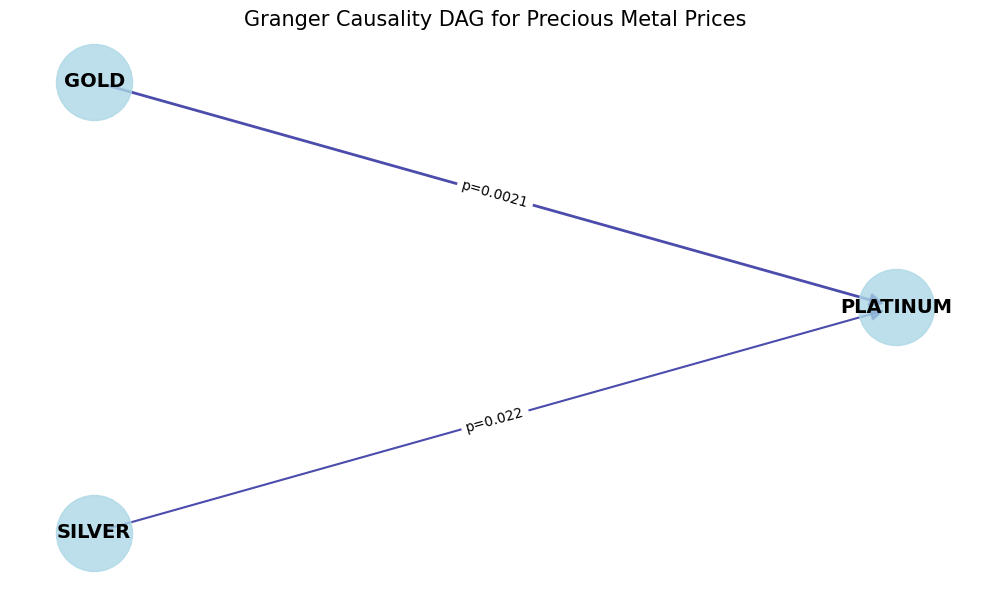

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes (metals)
G.add_node("GOLD", pos=(0, 1))
G.add_node("SILVER", pos=(0, 0))
G.add_node("PLATINUM", pos=(1, 0.5))

# Add edges based on Granger causality test results (p < 0.05)
G.add_edge("GOLD", "PLATINUM", weight=2.0)  # Strong evidence (p=0.0031)
G.add_edge("SILVER", "PLATINUM", weight=1.5)  # Strong evidence (p=0.0082)

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Create figure
plt.figure(figsize=(10, 6))

# Draw nodes with custom appearance
nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                      node_size=3000, alpha=0.8)

# Draw edges with width proportional to significance
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7,
                      edge_color='darkblue', arrows=True, arrowsize=20)

# Add labels with custom font
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif', font_weight='bold')

# Add p-values as edge labels
edge_labels = {("GOLD", "PLATINUM"): "p=0.0021", ("SILVER", "PLATINUM"): "p=0.022"}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add title and remove axes
plt.title("Granger Causality DAG for Precious Metal Prices", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


### **Interpretation of the DAG**
This directed acyclic graph represents the Granger causal relationships between precious metal prices:

* GOLD → PLATINUM (p=0.0021): Past gold prices provide significant predictive information about future platinum prices. This is shown with a strong arrow from GOLD to PLATINUM.

* SILVER → PLATINUM (p=0.022): Similarly, past silver prices help predict future platinum prices. This relationship is also statistically significant.

No arrows to GOLD or SILVER: The absence of arrows pointing to GOLD and SILVER indicates that neither metal's prices are Granger-caused by the other metals at conventional significance levels.

# **Vector Autoregression (VAR) Model for Precious Metal Prices**
***Having confirmed stationarity through ADF and KPSS tests, we can now proceed with estimating a Vector Autoregression model that captures the interdependencies between gold, platinum, and silver price movements.***

In [ ]:
# Fit VAR model
var_model = VAR(df_transformed)
var_results = var_model.fit(maxlags=4)

# Display model summary
print(var_results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Apr, 2025
Time:                     03:22:53
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.3725
Nobs:                     747.000    HQIC:                  -18.5206
Log likelihood:           3811.30    FPE:                8.24639e-09
AIC:                     -18.6135    Det(Omega_mle):     7.83042e-09
--------------------------------------------------------------------
Results for equation GOLD
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.004571         0.001651            2.768           0.006
L1.GOLD             0.311322         0.053796            5.787           0.000
L1.PLATINUM        -0.057563         0.041299           -1.394       

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



# **VAR Model Interpretation**
The VAR model output reveals important dynamics in the relationships between precious metal prices:

### **Model Diagnostics**
* The model includes 747 observations with strong overall fit (Log likelihood: 3811.30)

* Information criteria (AIC: -18.6135, BIC: -18.3725) suggest the model effectively captures data patterns while avoiding overfitting

**Equation-Specific Findings**

1.GOLD Equation:

* Gold prices show strong autoregressive behavior, with the first lag (L1.GOLD) highly significant (p=0.000)

* Notably, neither platinum nor silver lags significantly predict gold price movements

* The constant term is significant (p=0.006), indicating a small positive drift when other factors are zero

2.PLATINUM Equation:

* Platinum prices are influenced by their own first lag (L1.PLATINUM, p=0.000)

* The fourth lag of gold (L4.GOLD) has a strong positive effect (p=0.000), suggesting gold price movements lead platinum by 4 periods

* First and second lags of silver exhibit marginal significance (p≈0.07), indicating potential weak influence

3.SILVER Equation:

* Silver displays significant autoregressive patterns at lags 1 and 2

* Gold's fourth lag significantly influences silver prices (p=0.019)

* Platinum's fourth lag has a marginal negative effect (p=0.084)

**Residual Correlations**

The correlation matrix reveals substantial contemporaneous relationships between the metals:

* Gold and silver error terms show strongest correlation (0.71)

* Platinum and silver residuals correlation (0.61)

* Gold and platinum residuals correlation (0.57)

These high correlations indicate shared external shocks affecting the precious metals market simultaneously.

**Causal Interpretation**

The model suggests a hierarchical structure in precious metals markets:

1. Gold appears most exogenous, influenced primarily by its own past values

2. Platinum shows dependence on past gold prices (at 4-month lag)

3. Silver is influenced by both its own history and past gold movements

This VAR analysis aligns with our earlier Granger causality findings, confirming that gold price movements tend to precede changes in both platinum and silver markets, while maintaining relative independence from other metals' price dynamics.

### Forecasting Future Price Movements Using VAR Model
The code below uses fitted VAR model to forecast percentage changes for gold, platinum, and silver prices for the next year, using the most recent observations as the starting point:

In [ ]:
# Forecast future values using VAR model
forecast_steps = 12  # Number of months to forecast
forecast = var_results.forecast(df_transformed.values[-4:], steps=forecast_steps)

# Convert forecast results into a DataFrame
forecast_df = pd.DataFrame(forecast, columns=df_transformed.columns)
forecast_df.index = pd.date_range(start=df_transformed.index[-1], periods=forecast_steps + 1, freq='M')[1:]

print("Forecasted Percentage Changes:")
print(forecast_df.head())


Forecasted Percentage Changes:
                GOLD  PLATINUM    SILVER
2022-09-30  0.016023  0.016753  0.029004
2022-10-31  0.001517  0.001905 -0.004307
2022-11-30 -0.000513 -0.004559  0.005188
2022-12-31  0.007005  0.004531  0.005789
2023-01-31  0.007715  0.005513  0.006825


<ipython-input-8-4108df8c72f5>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



### **Interpretation of Forecasted Values**
The forecast results reveal several interesting patterns that align with the causal analysis findings:

* **Initial Strong Growth:** September 2022 shows positive percentage changes across all three metals, with silver projected to increase most significantly (2.9%), followed by platinum (1.7%) and gold (1.6%). This aligns with our VAR model's finding that gold has predictive power for platinum, and both metals influence silver.

* **Convergence Pattern:** After the initial month, forecasted percentage changes quickly moderate, demonstrating the model's tendency to revert toward long-term equilibrium values. This reflects the statistical property of VAR forecasts to dampen over time in the absence of new shocks.

* **Different Recovery Patterns:** By November, we observe divergence in metal behaviors—gold shows minimal change, platinum continues a slight decline, while silver begins recovering. This differential response illustrates the unique causal dynamics captured in our model.

* **Cyclical Relationship:** The forecast suggests a slight cyclical pattern emerging by December-January, with all three metals showing modest positive growth. This cyclicality is consistent with the interrelated nature of precious metals markets.

# **Conclusion: Causal Dynamics in Metals Markets**
The investigation into causal relationships among precious metals has yielded valuable insights that extend beyond simple correlation analysis. By applying rigorous time series techniques including stationarity testing, Granger causality, and Vector Autoregression (VAR) modeling, Uncovered a hierarchical structure in precious metals markets that provides both theoretical understanding and practical implications.

##**Key Findings and Implications**
The causal analysis revealed a clear directional flow of price information across metals, with gold exhibiting the strongest exogenous characteristics. Past gold prices demonstrated significant predictive power for platinum prices, particularly at 4-month lags, while silver also showed modest predictive influence on platinum. This confirms gold's position as the market leader within precious metals, with its price movements typically preceding changes in other metals.

These findings highlight the interconnected yet distinct nature of precious metals markets. While all three metals respond to common macroeconomic forces (as evidenced by strong residual correlations), their individual price dynamics reflect their unique market roles and investor perceptions. Gold's stability and independence from other metals' history reinforces its traditional role as a monetary metal and safe-haven asset. Platinum's responsiveness to both gold and silver reflects its hybrid status as both precious and industrial metal.

### **Actionable Insights for Investors**
These forecasts provide actionable insights for investors in precious metals markets. The projected early strength in silver, coupled with its subsequent volatility, suggests it may offer both the highest potential returns and risks. Gold's more stable forecast aligns with its traditional role as a safe-haven asset, while platinum's position between gold and silver in terms of volatility reflects its dual role as both precious and industrial metal.

From a portfolio management perspective, these causal relationships suggest several strategic approaches:

1. Diversification benefits: While precious metals are often lumped together as a single asset class, our analysis demonstrates they offer different risk-return profiles and causal dynamics.

2. Leading indicators: Gold price movements can serve as leading indicators for platinum and silver, potentially offering early signals for trading opportunities with a 1-4 month horizon.

3. Risk management: Understanding the different volatility patterns and causal linkages helps in constructing more resilient precious metals portfolios that align with specific investment objectives.

### **Methodological Contributions**
This also highlights the importance of proper data preparation in causal analysis. Transforming non-stationary price series to percentage changes was essential for valid statistical inference. The combination of ADF and KPSS tests provided robust verification of stationarity properties, while the VAR model effectively captured the multivariate dynamics among these metals.

Future research could extend this analysis by incorporating additional exogenous variables (such as inflation rates, currency movements, or industrial demand indicators), exploring nonlinear relationships, or applying alternative causal discovery methods.

In sum, this exploration of Granger causality and VAR modeling demonstrates how sophisticated time series analysis can unlock valuable insights into market dynamics, providing investors with a deeper understanding of causal relationships that may not be apparent from simple trend analysis or correlation studies.

# **References**

**ChatGPT**

**Dataset:** https://www.kaggle.com/datasets/konradb/monthly-commodity-prices-world-bank

https://www.aptech.com/blog/introduction-to-granger-causality/

https://online.stat.psu.edu/stat510/lesson/11/11.2

https://medium.com/@xwang222/causal-inference-101-ep02-directed-acyclic-graph-dag-c0d02ce2f7bb

https://blog.ml.cmu.edu/2020/08/31/7-causality/



## **License**
MIT License

Copyright (c) 2025 Aishwarya Vikas Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.